<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Week_6_IP_Jonah_Okiru_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Define the question

### a) Specifying the question

The question requires we come up with a model using logistic regression and polynomial regression. The model should be able to predict the number of goals scored by the home team and number of goals scored by the away team.

### b) Defining the metric of success


The model should be able to predict the goals scored by both home and away team by 70% accuracy based on the position of the team  at FIFA rankings.

### c) Understanding the contest

Each time two teams played against each other the outcome of the match is mostly determined by the venue of the match, rank of the team in the FIFA ranking, the tournament type. These are the key features that will help to build the model for the above contest.

### d) Recording the Experimental design.

Hypothesis:  To come up with the model that will be able to predict the outcome of a match between two teams based on the teams FIFA rankings, Tournament type etc

X-axis: Rank of away team, rank of home team, tournament type, year and country

Y-axis: home team score and away team score.

Experimental setup: Hypothesise the number of goals scored by home team and away team

Design of experiment: Analyse the data on the matches played by various teams at different tournaments.

Sample size = 40000 for the result datasets, and 55000 for the rank dataset.

### e) Data relevance.

The provided datasets were not so relevance since some of them were from the year 1870's, Which in most cases does not reflect the current situations.

# 2.Reading the data


## a)Import the neccessary libraries

In [421]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score


## b) Load the datasets using pandas dataframe

In [422]:
#load the rank dataset
rank=pd.read_csv('/content/fifa_ranking.csv')
#load the results dataset
result=pd.read_csv('/content/results.csv')

## c)Preview the two datasets

In [423]:
#preview of the first three columns of the fifa rank dataset
rank.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [478]:
#preview of the first three of the result dataset
result.head(3)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


## d) Concat the two datasets using pandas libraries

In [425]:
#concat the results and the rank dataset
result_rank=pd.concat([result, rank], axis =1)
#preview the combined dataframe
result_rank.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [426]:
#check the columns datatypes of result rank dataset
result_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     40839 non-null  object 
 1   home_team                40839 non-null  object 
 2   away_team                40839 non-null  object 
 3   home_score               40839 non-null  float64
 4   away_score               40839 non-null  float64
 5   tournament               40839 non-null  object 
 6   city                     40839 non-null  object 
 7   country                  40839 non-null  object 
 8   neutral                  40839 non-null  object 
 9   rank                     57793 non-null  int64  
 10  country_full             57793 non-null  object 
 11  country_abrv             57793 non-null  object 
 12  total_points             57793 non-null  float64
 13  previous_points          57793 non-null  int64  
 14  rank_change           

In [427]:
#convert the date and rank_date columns from object into datetype 
#and disply both columns of date and rank_date in year only
result_rank['date']=pd.to_datetime(result_rank['date'])
result_rank['rank_date']=pd.to_datetime(result_rank['rank_date'])

#conver the date and rank_date column from year, month ,day to year only
result_rank['date'] = pd.DatetimeIndex(result_rank['date']).year
result_rank['rank_date'] = pd.DatetimeIndex(result_rank['rank_date']).year
result_rank.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872.0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993
1,1873.0,England,Scotland,4.0,2.0,Friendly,London,England,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993


In [428]:
#extract the observations from 1993 to 2018
result_rank_df=result_rank[(result_rank['date']>= 1992) & (result_rank['rank_date'] <= 2018)]
result_rank_df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
16781,1992.0,Egypt,Czechoslovakia,2.0,0.0,Friendly,Cairo,Egypt,False,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2001
16782,1992.0,DR Congo,Ivory Coast,2.0,0.0,Friendly,Kinshasa,Zaïre,False,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2001
16783,1992.0,Guyana,Barbados,0.0,2.0,Friendly,Georgetown,Guyana,False,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2001


## e)Further concating and merging to obtain the final dataset for analysis

In [429]:
#check the colums of the combined dataset
result_rank_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [430]:
#Remove unneccessary columns
result_rank_df.drop([ 'city','neutral','country_abrv','total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'], axis=1, inplace=True)
#preview
result_rank_df.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,rank_date
16781,1992.0,Egypt,Czechoslovakia,2.0,0.0,Friendly,Egypt,52,Jamaica,2001
16782,1992.0,DR Congo,Ivory Coast,2.0,0.0,Friendly,Zaïre,53,Austria,2001


In [431]:
#The code below displays the observation where the date is equivalent to rank date
result_rank_df1=result_rank_df[(result_rank_df['rank']) & (result_rank_df['date']==result_rank_df['rank_date'])]
result_rank_df1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,rank_date
28036,2006.0,Morocco,DR Congo,3.0,0.0,Friendly,Morocco,73,Belarus,2006
28038,2006.0,Tunisia,Libya,1.0,0.0,Friendly,Tunisia,75,Northern Ireland,2006


In [432]:
#add the new columns of rank of home team, rank of away team and date
Home_rank=result_rank_df1[(result_rank_df1['rank']) & (result_rank_df1['home_team']==result_rank_df1['country_full'])]
Home_rank
#Get the rank of home team


,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,rank_date
28771,2006.0,Luxembourg,Togo,0.0,0.0,Friendly,Luxembourg,193,Luxembourg,2006
29661,2007.0,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,Republic of Ireland,51,Republic of Ireland,2007
29685,2007.0,China PR,Burma,7.0,0.0,FIFA World Cup qualification,China PR,75,China PR,2007


In [433]:
#drop unneccessary columns and rename of columns from the home_rank dataset
#drop the columns of country and date
Home_rank.drop(['country', 'date'], axis=1, inplace=True)

#Rename the columns of tournament,country_full and rank date to tournament type
#country and date respectively.
Home_rank.rename(columns={'tournament': 'tournament_type', 'country_full':
                          'country', 'rank_date': 'year', 'rank': 'home_team_rank'},
                 inplace=True)
#preview home rank dataset
Home_rank


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year
28771,Luxembourg,Togo,0.0,0.0,Friendly,193,Luxembourg,2006
29661,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,51,Republic of Ireland,2007
29685,China PR,Burma,7.0,0.0,FIFA World Cup qualification,75,China PR,2007


In [434]:
#Get the rank of the away teams
Away_rank=result_rank_df1[(result_rank_df1['rank']) & (result_rank_df1['away_team']==result_rank_df1['country_full'])]
Away_rank

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,rank_date
28390,2006.0,Argentina,Mexico,2.0,1.0,FIFA World Cup,Germany,17,Mexico,2006
28681,2006.0,Niger,Uganda,0.0,0.0,African Cup of Nations qualification,Niger,103,Uganda,2006
29219,2007.0,Latvia,Denmark,0.0,2.0,UEFA Euro qualification,Latvia,23,Denmark,2007


In [435]:
#drop unneccessary columns and rename of columns from the away_rank dataset
#drop the columns of country and date
Away_rank.drop(['country', 'date'], axis=1, inplace=True)

#Rename the columns of tournament,country_full and rank date to tournament type
#country and date respectively.
Away_rank.rename(columns={'tournament': 'tournament_type', 'country_full':
                          'country', 'rank_date': 'year', 'rank': 'away_team_rank'},
                 inplace=True)
#preview rank rank dataset
Away_rank

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,home_team,away_team,home_score,away_score,tournament_type,away_team_rank,country,year
28390,Argentina,Mexico,2.0,1.0,FIFA World Cup,17,Mexico,2006
28681,Niger,Uganda,0.0,0.0,African Cup of Nations qualification,103,Uganda,2006
29219,Latvia,Denmark,0.0,2.0,UEFA Euro qualification,23,Denmark,2007


In [436]:
#Finally concatinate the two datasets into asingle datasets
Concat_dataset=pd.concat([Home_rank, Away_rank])
Concat_dataset.head(6)


,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,Friendly,193.0,Luxembourg,2006,NaN
29661,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,51.0,Republic of Ireland,2007,NaN
29685,China PR,Burma,7.0,0.0,FIFA World Cup qualification,75.0,China PR,2007,NaN
28390,Argentina,Mexico,2.0,1.0,FIFA World Cup,NaN,Mexico,2006,17.0
28681,Niger,Uganda,0.0,0.0,African Cup of Nations qualification,NaN,Uganda,2006,103.0
29219,Latvia,Denmark,0.0,2.0,UEFA Euro qualification,NaN,Denmark,2007,23.0


# 3. Checking the data

In [437]:
#Determining the no. of records in our dataset
Concat_dataset.shape

(6, 9)

In [438]:
# Previewing the top of our dataset
Concat_dataset.head(3)

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,Friendly,193.0,Luxembourg,2006,NaN
29661,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,51.0,Republic of Ireland,2007,NaN
29685,China PR,Burma,7.0,0.0,FIFA World Cup qualification,75.0,China PR,2007,NaN


In [439]:
# Previewing the bottom of our dataset
Concat_dataset.tail(3)

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28390,Argentina,Mexico,2.0,1.0,FIFA World Cup,NaN,Mexico,2006,17.0
28681,Niger,Uganda,0.0,0.0,African Cup of Nations qualification,NaN,Uganda,2006,103.0
29219,Latvia,Denmark,0.0,2.0,UEFA Euro qualification,NaN,Denmark,2007,23.0


In [440]:
# Checking whether each column has an appropriate datatype
Concat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 28771 to 29219
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   home_team        6 non-null      object 
 1   away_team        6 non-null      object 
 2   home_score       6 non-null      float64
 3   away_score       6 non-null      float64
 4   tournament_type  6 non-null      object 
 5   home_team_rank   3 non-null      float64
 6   country          6 non-null      object 
 7   year             6 non-null      int64  
 8   away_team_rank   3 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 480.0+ bytes


# 4.  External dataset validation

a) Validation [fifa rankings](https://www.fifa.com/fifa-world-ranking/men?dateId=id143)

# 5. Tidying the dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


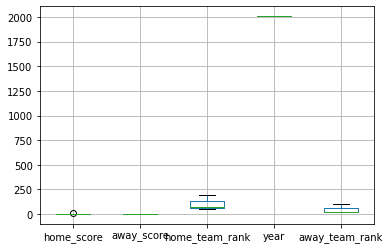

In [441]:
# Checking for Outliers
Concat_dataset.boxplot()

In [443]:
# Identifying the Missing Data
Concat_dataset.isnull().sum()

home_team          0
away_team          0
home_score         0
away_score         0
tournament_type    0
home_team_rank     3
country            0
year               0
away_team_rank     3
dtype: int64

In [444]:
# Dealing with the Missing Data
# I conclude to fill the missing values in the columns of home_team_rank and 
#away_team_rank with their mean since the two columns focus on two different data categoris i e 
#rank of home team and away team respectively

#The home team rank column
Concat_dataset['home_team_rank'].fillna(Concat_dataset['home_team_rank'].mean(), inplace=True)

#The away team rank
Concat_dataset['away_team_rank'].fillna(Concat_dataset['away_team_rank'].mean(), inplace=True)


In [445]:
# More data cleaning procedures
#check if the missing data still exists
Concat_dataset.isnull().sum()

home_team          0
away_team          0
home_score         0
away_score         0
tournament_type    0
home_team_rank     0
country            0
year               0
away_team_rank     0
dtype: int64

# 6. Exploratory dataset

In [446]:
# Ploting the univariate summaries and recording our observations

#preview the dataset
Concat_dataset.head(6)

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,Friendly,193.000000,Luxembourg,2006,47.666667
29661,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,51.000000,Republic of Ireland,2007,47.666667
29685,China PR,Burma,7.0,0.0,FIFA World Cup qualification,75.000000,China PR,2007,47.666667
28390,Argentina,Mexico,2.0,1.0,FIFA World Cup,106.333333,Mexico,2006,17.000000
28681,Niger,Uganda,0.0,0.0,African Cup of Nations qualification,106.333333,Uganda,2006,103.000000
29219,Latvia,Denmark,0.0,2.0,UEFA Euro qualification,106.333333,Denmark,2007,23.000000


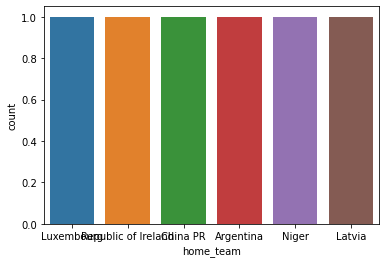

In [447]:
#Visualize home team
sns.countplot(x=Concat_dataset['home_team'], data=Concat_dataset)

From the bar chart visualization displayed above the its clearly observed that the teams that played at home only played once, as home team.

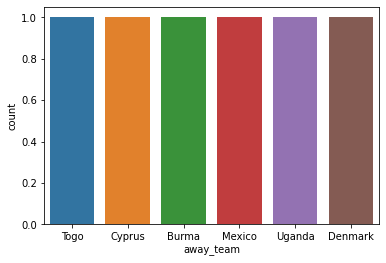

In [448]:
#Visualize the away team
sns.countplot(x=Concat_dataset['away_team'], data=Concat_dataset)

From the bar chart vizualization displayed above , its observed that all the away teams played once as away team

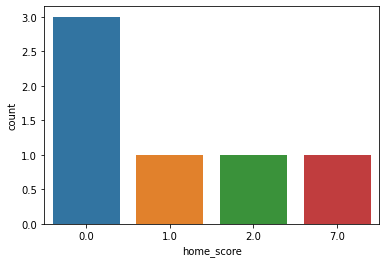

In [449]:
#Visualize home score
sns.countplot(x=Concat_dataset['home_score'], data=Concat_dataset)

From the visualization displayed by the bar charts above. the score of 0 for home team occured most at three times followed by the score of 1, 2 and 7 each occuring only once.

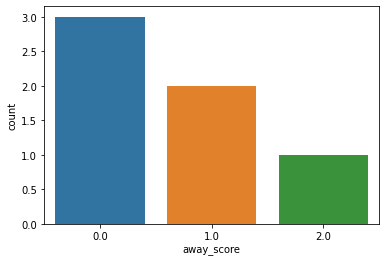

In [450]:
#Visualize away score
sns.countplot(x=Concat_dataset['away_score'], data=Concat_dataset)

From the displayed bar chart visualization displayed above the score of away team that occured the most is 0 at three times, followed by 1 goals occured at two times and lastely 2 goals that occured once. 

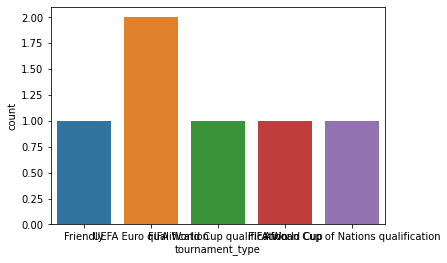

In [451]:
#Visualize Tournament type
sns.countplot(x=Concat_dataset['tournament_type'], data=Concat_dataset)

From the visualization above, the tournament that the compete in it most was is the EUFA Euro qualification at two times  followed by Friendly, Fifa Worldcup qualification, Fifa worldcup and Africa cup of nations qualifications. Each the participate once.

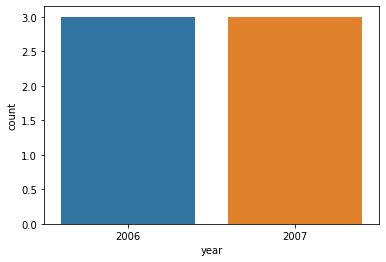

In [452]:
#plot the year
sns.countplot(x=Concat_dataset['year'], data=Concat_dataset)

The bar chart above indicates the matches happen in year 2006 and 2007, the matches happening thrice in each of the stated years.

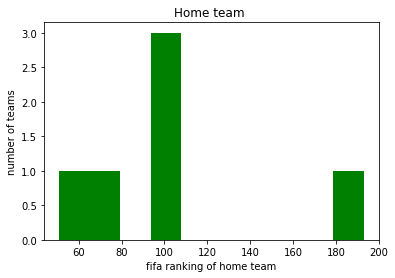

In [453]:
#Visualize home team ranking
plt.hist(Concat_dataset['home_team_rank'], color='green')
plt.title('Home team ')
plt.xlabel('fifa ranking of home team')
plt.ylabel('number of teams')
plt.show()

From the above histograms displays, the rank of most home was in the range of 95 to 110 , it had two teams, followed by the rank range from 55 to 79 and rank of 179 to 187 each having one team only.

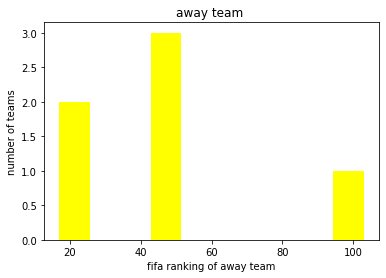

In [454]:
#Visualize away team ranking
plt.hist(Concat_dataset['away_team_rank'], color='yellow')
plt.title('away team ')
plt.xlabel('fifa ranking of away team')
plt.ylabel('number of teams')
plt.show()

From the histogram visuals displayed above , the rank of the majority of the home teams ranges from 42 to 50 which had three teams, followed bythe rank of 16 to 25 with two teams and lastely rank of 95 to 105 with one team only.

## 7. Implementing the solution.

### a) ploynomial approach

In [455]:
#preview the dataset
Concat_dataset.head(3)

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,Friendly,193.0,Luxembourg,2006,47.666667
29661,Republic of Ireland,Cyprus,1.0,1.0,UEFA Euro qualification,51.0,Republic of Ireland,2007,47.666667
29685,China PR,Burma,7.0,0.0,FIFA World Cup qualification,75.0,China PR,2007,47.666667


In [456]:
#Convert the tournament variables into numerical variables using label encoder
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#assign the numerical values to values of the tournament column
Concat_dataset['tournament_type']=labelencoder.fit_transform(Concat_dataset['tournament_type'])
Concat_dataset

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,3,193.000000,Luxembourg,2006,47.666667
29661,Republic of Ireland,Cyprus,1.0,1.0,4,51.000000,Republic of Ireland,2007,47.666667
29685,China PR,Burma,7.0,0.0,2,75.000000,China PR,2007,47.666667
28390,Argentina,Mexico,2.0,1.0,1,106.333333,Mexico,2006,17.000000
28681,Niger,Uganda,0.0,0.0,0,106.333333,Uganda,2006,103.000000
29219,Latvia,Denmark,0.0,2.0,4,106.333333,Denmark,2007,23.000000


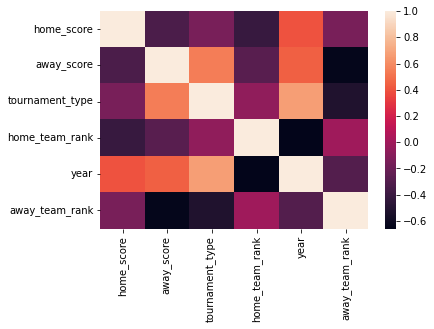

In [457]:
# check for the multicollinearity of the variables
sns.heatmap(Concat_dataset.corr())

From the above heatmap visualization there were collinearity between home team rank and year,between the away score and away team rank and between tournament type and year. The variables home team rank, away score and away team  will not be dropped since they key roles in building the prediction model. For the year and tournament type the variables will be dropped since they don't play key roles in building the model.

### (i) model 1.







In [458]:
#Assigned varaiable x=rank of home team, y= rank of away team,
# and z=home team scores

#define attribute and labels as shown below
X=Concat_dataset.iloc[:, 5:6].values
Y=Concat_dataset.iloc[:,8].values
z=Concat_dataset.iloc[:, 2:3].values







In [459]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X, Y)
 
poly.fit(X_poly, z)
lin2 = LinearRegression()
lin2.fit(X_poly, z)

LinearRegression()

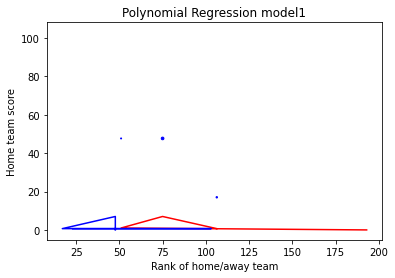

In [460]:
# Visualising the Polynomial Regression results
plt.scatter(X, Y, z,  color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X,Y)), color = 'red')
plt.plot(Y, lin2.predict(poly.fit_transform(X,Y)), color = 'blue')
plt.title('Polynomial Regression model1')
plt.xlabel('Rank of home/away team')
plt.ylabel('Home team score')
 
plt.show()

In [461]:
# Predict using Polynomial Regression

z_pred= lin2.predict(poly.fit_transform(X,Y))
z_pred


array([[-2.65352185e-11],
       [ 1.00000000e+00],
       [ 7.00000000e+00],
       [ 6.66666667e-01],
       [ 6.66666667e-01],
       [ 6.66666667e-01]])

In [462]:
#calculate the mean squared error
z_true=z
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(z_true, z_pred)
#Calculate RMSE
import math
RMSE=math.sqrt(MSE)
RMSE

0.6666666666666667

From the RMSE calculated above which is approximately 67% , which implies the difference between the model values predicted by the model and observed value is 67%. Therefore we conclude that the model doesn't not fits the data the way we had anticipated earlier. Since there's a huge difference of 67% btween the value predicted by the model and the actual value.

## (ii) model 2

In [463]:
#Assigned varaiable x=rank of home team, y= rank of away team,
# and z=away team scores

#define attribute and labels as shown below
X1=Concat_dataset.iloc[:, 5:6].values
Y1=Concat_dataset.iloc[:,8].values
z1=Concat_dataset.iloc[:, 3:4].values

In [464]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
poly1 = PolynomialFeatures(degree = 4)
X_poly1 = poly1.fit_transform(X1, Y1)
 
poly1.fit(X_poly1, z1)
lin3 = LinearRegression()
lin3.fit(X_poly1, z1)

LinearRegression()

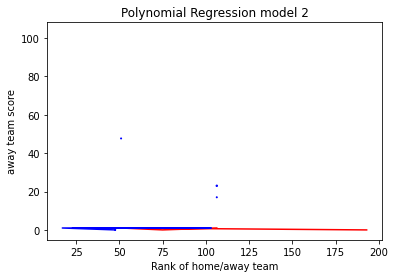

In [465]:
# Visualising the Polynomial Regression results
plt.scatter(X1, Y1, z1,  color = 'blue')
 
plt.plot(X1, lin3.predict(poly1.fit_transform(X1,Y1)), color = 'red')
plt.plot(Y1, lin3.predict(poly1.fit_transform(X1,Y1)), color = 'blue')
plt.title('Polynomial Regression model 2')
plt.xlabel('Rank of home/away team')
plt.ylabel('away team score')
 
plt.show()

In [466]:
# Predict using Polynomial Regression

z1_pred= lin3.predict(poly1.fit_transform(X1,Y1))
z1_pred


array([[4.21884749e-13],
       [1.00000000e+00],
       [1.21058719e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

In [467]:
#calculate the mean squared error
z1_true=z1
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(z1_true, z1_pred)
#Calculate RMSE
import math
RMSE1=math.sqrt(MSE1)
RMSE1

0.5773502691896257

From the RMSE calculated above which is approximately 58% , which implies the difference between the model values predicted by the model and observed value is 58%. Therefore we conclude that the model doesn't not fits the data the way we had anticipated earlier. Since there's a huge difference of 58% btween the value predicted by the model and the actual value.

### b) Regression approach

In [468]:
#preview the dataset
Concat_dataset.head(3)

,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,Luxembourg,Togo,0.0,0.0,3,193.0,Luxembourg,2006,47.666667
29661,Republic of Ireland,Cyprus,1.0,1.0,4,51.0,Republic of Ireland,2007,47.666667
29685,China PR,Burma,7.0,0.0,2,75.0,China PR,2007,47.666667


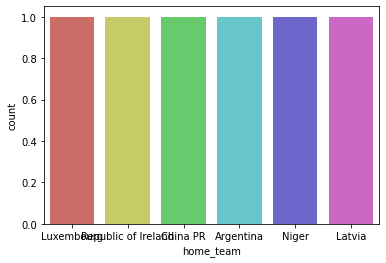

In [469]:
#Check if the target home team variable is binnary
sns.countplot(x=Concat_dataset['home_team'], data=Concat_dataset, palette='hls')

From the bar chart visualization displayed above, clearly confirms the target variable is binary.

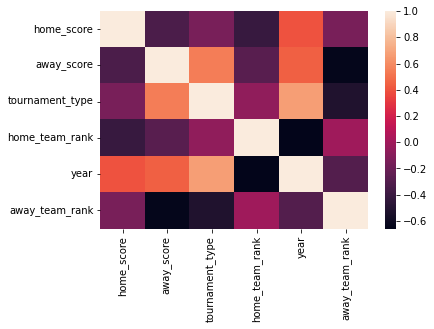

In [470]:
#Check for the Indepedence among the features
sns.heatmap(Concat_dataset.corr())

From the above heatmap there's collinearity between away score and away team rank and between home team rank and year respectively. The collinearly variables above won't be dropped due to them being key in the building of the predictive model.

In [471]:
#Convert the colum values to numerical using label encoder
Concat_dataset['home_team']=labelencoder.fit_transform(Concat_dataset['home_team'])
Concat_dataset['away_team']=labelencoder.fit_transform(Concat_dataset['away_team'])
Concat_dataset['country']=labelencoder.fit_transform(Concat_dataset['country'])
Concat_dataset['year']=labelencoder.fit_transform(Concat_dataset['year'])
Concat_dataset


,home_team,away_team,home_score,away_score,tournament_type,home_team_rank,country,year,away_team_rank
28771,3,4,0.0,0.0,3,193.000000,2,0,47.666667
29661,5,1,1.0,1.0,4,51.000000,4,1,47.666667
29685,1,0,7.0,0.0,2,75.000000,0,1,47.666667
28390,0,3,2.0,1.0,1,106.333333,3,0,17.000000
28681,4,5,0.0,0.0,0,106.333333,5,0,103.000000
29219,2,2,0.0,2.0,4,106.333333,1,1,23.000000


In [472]:
#split the dataset
X2=Concat_dataset.drop(['home_team'], axis=1)
y2=Concat_dataset['home_team']

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2, test_size=0.02, random_state=10)

In [473]:
#fitting the model
from sklearn.linear_model import LogisticRegression
LogReg2=LogisticRegression()
LogReg2.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [474]:
#use model to make prediction
y2_pred=LogReg2.predict(X2_test)

In [475]:
#evaluate the model
from sklearn.metrics import confusion_matrix
confusion_matrix2=confusion_matrix(y2_test, y2_pred)
confusion_matrix2

array([[0, 1],
       [0, 0]])

From the above confusion matrix obtained above the the true positive is zero, true negative is zero , false positive is 1 and false negative is zero.

### 8. Challenging the solution.

Since i got the RMSE of 67% and 58% These implies the value predicted by the model defer from the actual value by 67% and 58% respectively. I therefore conclude that the value predicted by the model is not true.




## 9. Follow up questions
 

## a) Did we have the wright data

No the data wasn't right since after concating the data and further preperation on the data i end up with the data with only less than twenty observations. Which isn't enough for building accurate predictive model.



# b) Do we need another data to answer the question?

Yes another data is needed to answer the questions , since the one used had very few observations after undergoing preperations.

# c) Did we have the right question

Yes , the question was right. and it will be properly answered provided we have the correct data.